<a href="https://colab.research.google.com/github/y93r/MachineLearning_DIO/blob/main/Desafio_DIO_Detec%C3%A7%C3%A3o_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
from scipy.stats import mode
import cv2
import os
import csv
import time
from google.colab.patches import cv2_imshow

In [28]:
path = '/content/img'
os.chdir(path)

#Salva o arquivo com titulo atualizado por data e hora
titulo = time.strftime("%Y-%m-%d") + '_' + time.strftime("%H-%M-%S")
saida = open('face_recon_'+titulo+'.csv', 'w')
export = csv.writer(saida, quoting=csv.QUOTE_NONNUMERIC)

In [29]:
file_list = []

for file in os.listdir(path):
    if file.endswith(".jpg"):
        file_list.append(file)

Esses arquivos xml estão disponíveis aqui:
https://github.com/opencv/opencv_attic/tree/master/opencv/data/haarcascades

O HaarCascade é um algoritmo de aprendizado baseado em AdaBoost, que seleciona um pequeno número de características visuais críticas de uma determinada imagem e as utiliza para a etapa de detecção e classificação de objetos.


Para a imagem Aic2.jpg, foram encontradas 4 faces!


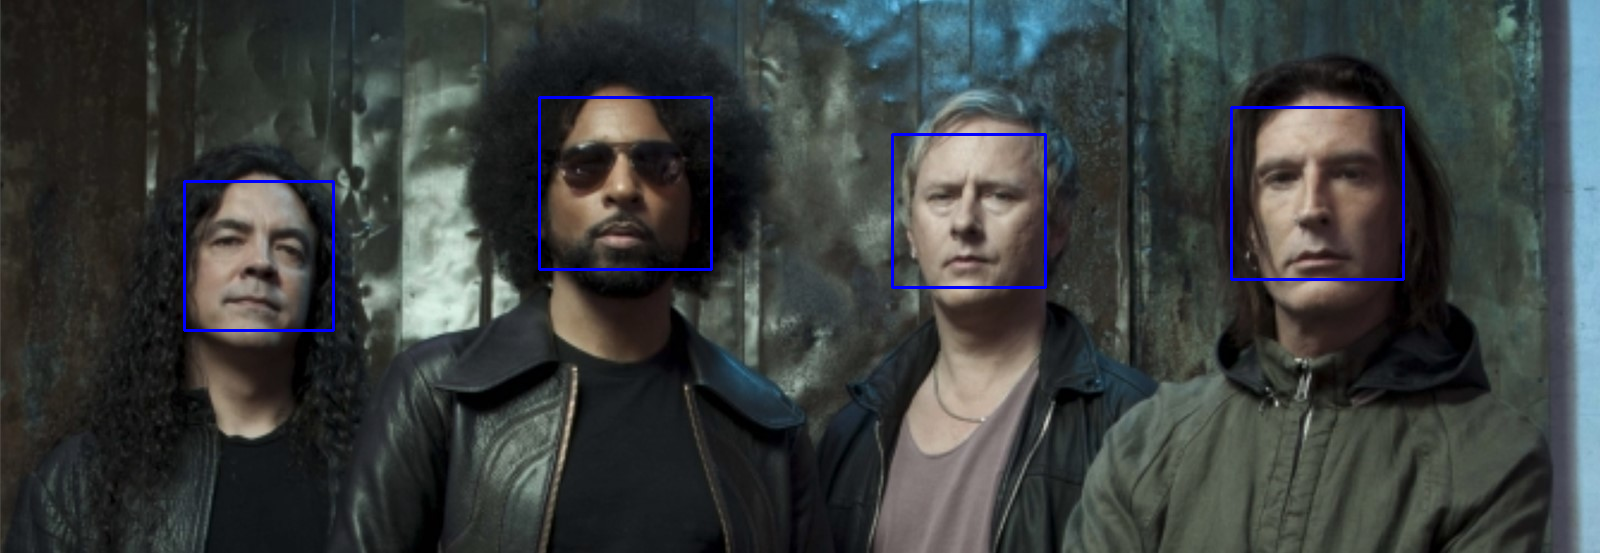

Para a imagem Aic2.jpg, foram encontradas 4 faces!


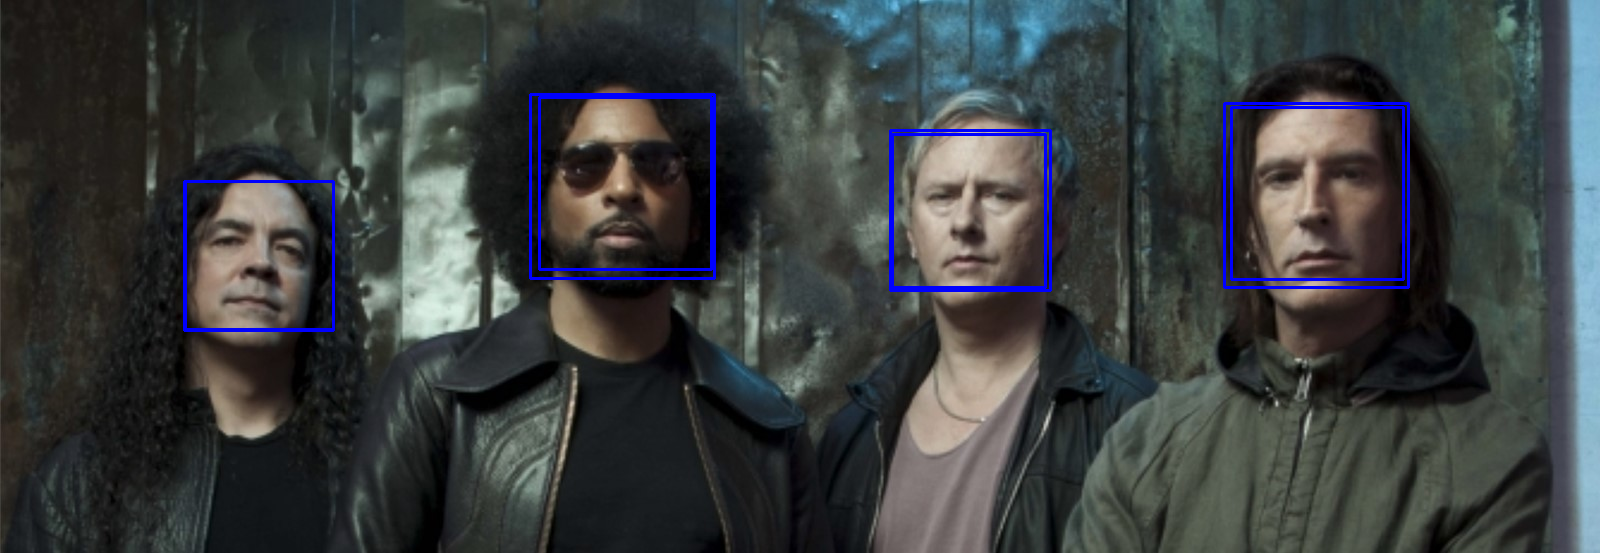

Para a imagem Aic2.jpg, foram encontradas 4 faces!


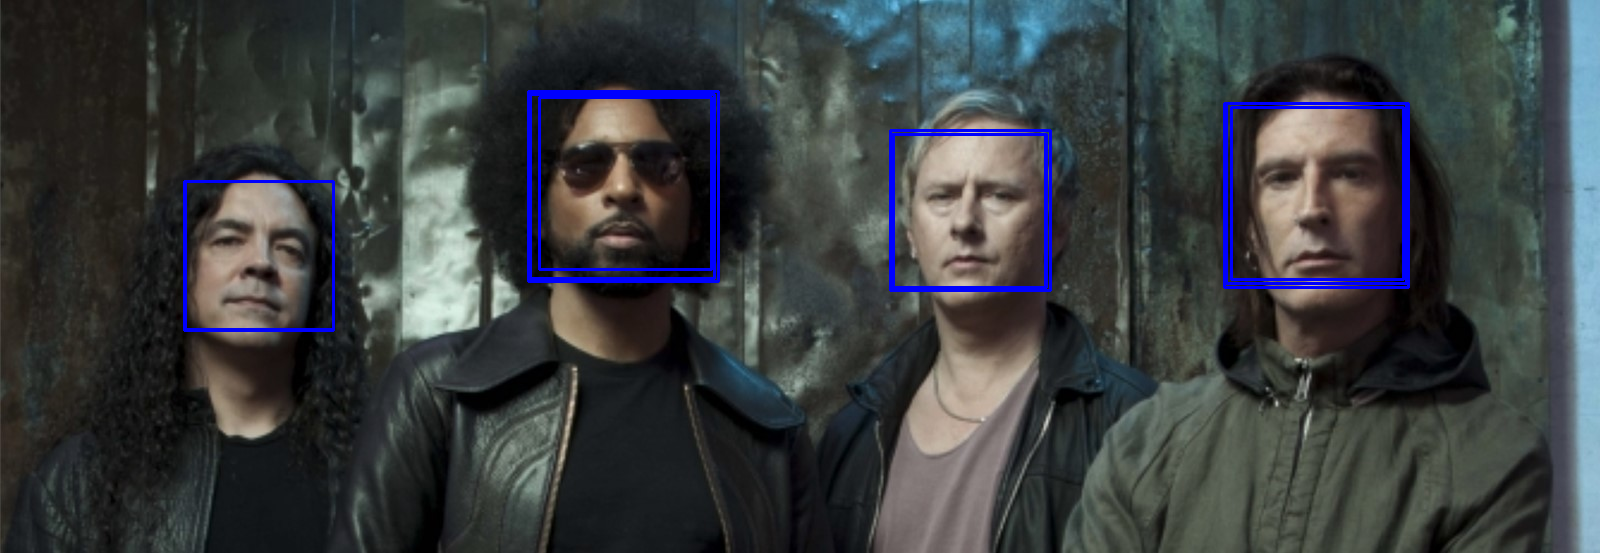

Para a imagem Aic2.jpg, foram encontradas 4 faces!


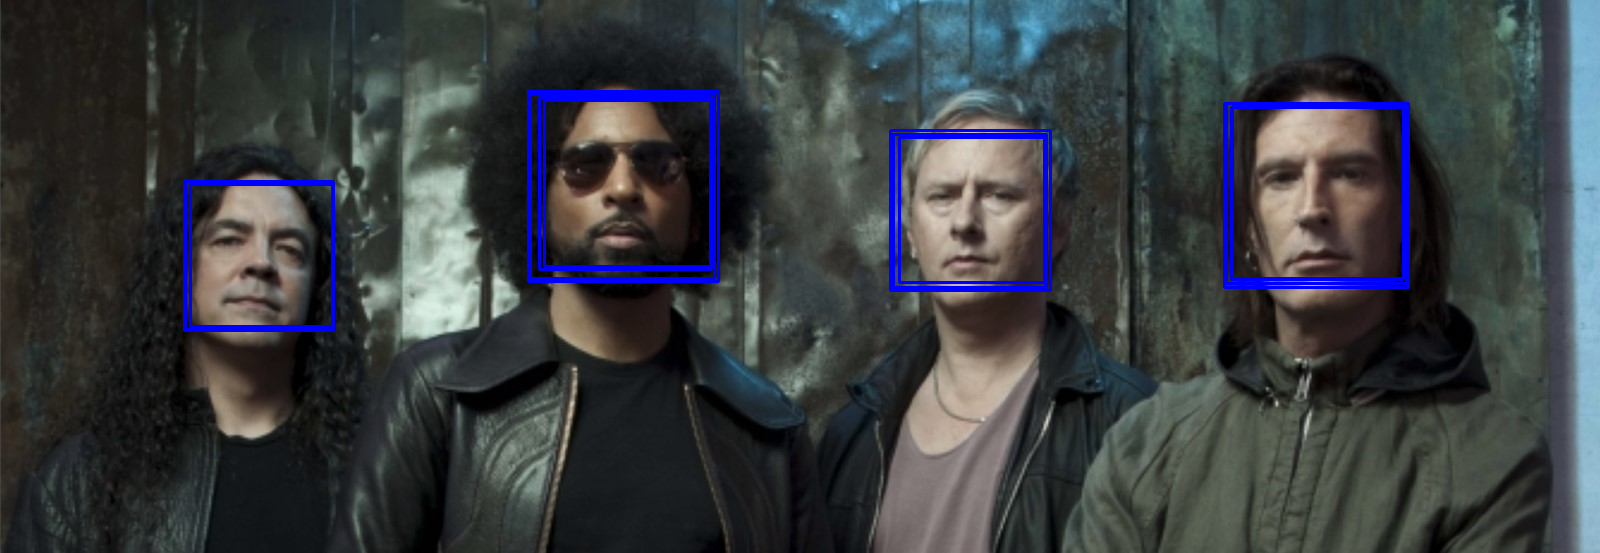

Resultado final


In [30]:
for file in file_list:
    
    #Estabelece os classificadores de face
    face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface')
    face_alt_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt')
    face_alt2_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt2')
    face_alt_tree_cascade = cv2.CascadeClassifier('/content/untitled')
    
    #Lê a imagem e converte para escala de cinza
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Faz as classificações
    faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30,30))
    faces2 = face_alt_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30,30))
    faces3 = face_alt2_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30,30))
    faces4 = face_alt_tree_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30,30))
    
    #Organiza as classificações numa lista para loop
    classifiers = [faces, faces2, faces3, faces4]
    
    # Coloca os quadrados nas faces
    for classifier in classifiers:
        for (x,y,w,h) in classifier:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
        
        print("Para a imagem "+file+", foram encontradas {0} faces!".format(len(classifier)))
        
        #Exibe as imagens com retângulos
        cv2_imshow(img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    # Exibe a média, variância e moda de cada classificador
    encontrados = []
    
    for (classifier) in classifiers:
        x = format(len(classifier))
        encontrados.append(x)
    
    encontrados = np.asarray(encontrados, dtype = np.float16)
    media = np.mean(encontrados)
    variancia = np.var(encontrados)
    moda = float(mode(encontrados)[0])
    
    if file == file_list[0]:
        export.writerow(["imagem","media","variancia","moda"])
        export.writerow([file, media, variancia, moda])
    else:
        export.writerow([file, media, variancia, moda])

saida.close()

print ('Resultado final')